## Section 2

In [1]:
import pandas as pd
import numpy as np
import math
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("./NYC_Wi-Fi_Hotspot_Locations.csv")

## Question1

In [3]:
Question1=df['Provider'].nunique()
print(Question1)

17

## Question 2

In [33]:
print(df[df['Borough Name']=='Bronx']['Provider'].value_counts())

LinkNYC - Citybridge    137
ALTICEUSA               120
NYPL                     35
Transit Wireless         21
AT&T                      3
Name: Provider, dtype: int64


The second most common provider in Bronx is ALTICEUSA and there are 120 hotspots

## Question 3

In [35]:
Total=df['Location'].size
bool_park=df['Location'].str.contains("Park")
Num_park=bool_park[bool_park == True].size
percentage=Num_park/Total*100
print(percentage)

3.5854172943657723


## Question 4

In [36]:
Total=df['Location_T'].size
Library=df[df['Location_T'] == 'Library']
Num_Library=Library['Location_T'].size
Probability=1-Num_Library/Total
print(Probability)

0.9355227478156071


## Question 5

In [8]:
pop=pd.read_csv("Census_Demographics_at_the_Neighborhood_Tabulation_Area__NTA__level.csv")
wifi_NTA=df["Neighborhood Tabulation Area Code (NTACODE)"]
wifi_num=wifi_NTA.value_counts()
wifi_list=wifi_num.index.tolist()
wifi_num=wifi_num.tolist()
num_NTA=pd.DataFrame({'NTA':wifi_list,'Number':wifi_num},index=None)


In [9]:
pop_num=pop[["Geographic Area - Neighborhood Tabulation Area (NTA)* Code","Total Population 2010 Number"]]
pop_num=pop_num.dropna(axis=0)
pop_num=pop_num.rename(columns={'Geographic Area - Neighborhood Tabulation Area (NTA)* Code':'NTA','Total Population 2010 Number':'Population2010'})

In [10]:
num_NTA=num_NTA.merge(pop_num,how='left',on='NTA')

In [11]:
num_NTA=num_NTA[num_NTA['Number']>=30]
wifi_capita=num_NTA['Population2010'].div(num_NTA['Number'])
num_NTA['Wifi_per_capita']=wifi_capita
q75,q25 = np.percentile(num_NTA['Wifi_per_capita'],[75,25])
iqr=q75-q25
print(iqr)

697.0351651264959

The interquatile range of the averages is 697.04

## Question 6

In [12]:
Distance=df.sort_values(by=['Latitude','Longitude'],axis=0,ascending=True)
Distance=Distance[['Latitude','Longitude']]
Distance=Distance.div(180,axis=0).mul(3.1415926,axis=0) # Radians
R=6371 # km

In [13]:
# For the 1st point
Ave_Distance=[]
cloest3=Distance.iloc[1:4,:]
dLat=(cloest3.iloc[:,0].values-Distance.iloc[0,0])
dLon=(cloest3.iloc[:,1].values-Distance.iloc[0,1])
Mean_Lat=((cloest3.iloc[:,0]+Distance.iloc[0,0])/2)
D=R*(dLat**2 + (np.cos(Mean_Lat)*dLon)**2)**(1/2)
D=np.mean(D.values)*3280 # 1km = 3280 feet
Ave_Distance.append(D)

In [14]:
# For the 2nd point
cloest3=cloest3=Distance.iloc[0:4,:]
cloest3=cloest3.drop(labels=cloest3.iloc[1].name)
dLat=(cloest3.iloc[:,0].values-Distance.iloc[1,0])
dLon=(cloest3.iloc[:,1].values-Distance.iloc[1,1])
Mean_Lat=((cloest3.iloc[:,0]+Distance.iloc[1,0])/2)
D=R*(dLat**2 + (np.cos(Mean_Lat)*dLon)**2)**(1/2)
D=np.mean(D.values)*3280 # 1km = 3280 feet
Ave_Distance.append(D)

In [15]:
# For the other points
for i in range(2,len(Distance)-2):
    cloest4=Distance.iloc[i-2:i+3,:]
    cloest4=cloest4.drop(labels=cloest4.iloc[2].name)
    dLat=(cloest4.iloc[:,0].values-Distance.iloc[i,0])
    dLon=(cloest4.iloc[:,1].values-Distance.iloc[i,1])
    Mean_Lat=((cloest4.iloc[:,0]+Distance.iloc[i,0])/2)
    D4=R*(dLat**2 + (np.cos(Mean_Lat)*dLon)**2)**(1/2)
    D3=np.delete(D4.values,D4.values.argmax())
    D=np.mean(D3)*3280 # 1km = 3280 feet
    Ave_Distance.append(D)

In [16]:
cloest4=Distance.iloc[0:5,1].values
cloest4=np.delete(cloest4,cloest4.argmin())

In [17]:
# For the -2nd point
cloest3=cloest3=Distance.iloc[-4:,:]
cloest3=cloest3.drop(labels=cloest3.iloc[-2].name)
dLat=(cloest3.iloc[:,0].values-Distance.iloc[-2,0])
dLon=(cloest3.iloc[:,1].values-Distance.iloc[-2,1])
Mean_Lat=((cloest3.iloc[:,0]+Distance.iloc[-2,0])/2)
D=R*(dLat**2 + (np.cos(Mean_Lat)*dLon)**2)**(1/2)
D=np.mean(D.values)*3280 # 1km = 3280 feet
Ave_Distance.append(D)

In [18]:
# For the 1st point
cloest3=Distance.iloc[-4:-1,:]
dLat=(cloest3.iloc[:,0].values-Distance.iloc[-1,0])
dLon=(cloest3.iloc[:,1].values-Distance.iloc[-1,1])
Mean_Lat=((cloest3.iloc[:,0]+Distance.iloc[-1,0])/2)
D=R*(dLat**2 + (np.cos(Mean_Lat)*dLon)**2)**(1/2)
D=np.mean(D.values)*3280 # 1km = 3280 feet
Ave_Distance.append(D)

In [19]:
Distance_Array=np.array(Ave_Distance)
print(np.median(Distance_Array))

4268.464291950047

## Question 7

In [20]:
format_str="%m/%d/%Y"
week_wifi=df[df['Activated'].str.contains("9999")!=1]
week_days=pd.to_datetime(week_wifi['Activated'],format=format_str).apply(datetime.date).apply(datetime.weekday)
counts=week_days.value_counts()
fraction=counts.iloc[0]/counts.sum()
print(fraction)

0.24368825466520308

## Question 8

In [31]:
month_wifi=week_wifi
month_activate=pd.to_datetime(month_wifi['Activated'],format=format_str)
month_act_range=month_activate[(month_activate<datetime(2018,7,1))].dt.month.value_counts()
month_act_range.sort_index(inplace=True)

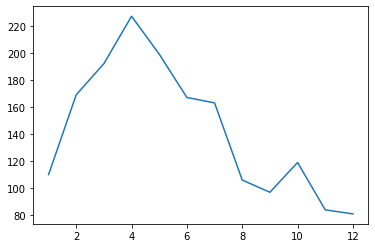

In [32]:
plt.plot(month_act_range.index,month_act_range.values)
plt.show()